In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import highlight_text

In [209]:
# the famous import font code to use Andale Mono
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [51]:
#import data
df = pd.read_csv('beeswarmTutorial.csv')

In [202]:
#set default colors
text_color = 'white'
background = '#313332'

In [53]:
#look at top of dataframe
df.head()

,Player,Pos,Squad,90s,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11
2,Che Adams\Che-Adams,FW,Southampton,19.0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36
4,Adrián\Adrian,GK,Liverpool,2.0,0


In [54]:
#create a new column for progressive passes per 90
df['per90'] = df['Prog']/df['90s']
df

,Player,Pos,Squad,90s,Prog,per90
0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726
1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11,1.037736
2,Che Adams\Che-Adams,FW,Southampton,19.0,38,2.000000
3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36,2.000000
4,Adrián\Adrian,GK,Liverpool,2.0,0,0.000000
...,...,...,...,...,...,...
492,Andre-Frank Zambo Anguissa\Andre-Frank-Zambo-A...,MF,Fulham,18.7,74,3.957219
493,Andi Zeqiri\Andi-Zeqiri,FWDF,Brighton,0.8,1,1.250000
494,Oleksandr Zinchenko\Oleksandr-Zinchenko,DF,Manchester City,7.1,39,5.492958
495,Hakim Ziyech\Hakim-Ziyech,FWMF,Chelsea,7.0,42,6.000000


In [55]:
#filter the dataframe so it is only players who have played more than 6.5 90's which is about 585 minutes
df = df[df['90s']>=6.5].reset_index()
df

,index,Player,Pos,Squad,90s,Prog,per90
0,0,Patrick van Aanholt\Patrick-van-Aanholt,DF,Crystal Palace,11.7,76,6.495726
1,1,Tammy Abraham\Tammy-Abraham,FW,Chelsea,10.6,11,1.037736
2,2,Che Adams\Che-Adams,FW,Southampton,19.0,38,2.000000
3,3,Tosin Adarabioyo\Tosin-Adarabioyo,DF,Fulham,18.0,36,2.000000
4,6,Ola Aina\Ola-Aina,DF,Fulham,17.7,69,3.898305
...,...,...,...,...,...,...,...
300,491,Wilfried Zaha\Wilfried-Zaha,FW,Crystal Palace,18.5,39,2.108108
301,492,Andre-Frank Zambo Anguissa\Andre-Frank-Zambo-A...,MF,Fulham,18.7,74,3.957219
302,494,Oleksandr Zinchenko\Oleksandr-Zinchenko,DF,Manchester City,7.1,39,5.492958
303,495,Hakim Ziyech\Hakim-Ziyech,FWMF,Chelsea,7.0,42,6.000000


In [56]:
df.describe()

,index,90s,Prog,per90
count,305.000000,305.000000,305.000000,305.000000
mean,241.468852,14.688525,43.655738,3.019502
std,146.384632,4.758721,31.651934,1.798697
min,0.000000,6.600000,0.000000,0.000000
25%,110.000000,10.900000,21.000000,1.932773
50%,243.000000,14.700000,37.000000,2.857143
75%,371.000000,18.800000,60.000000,4.000000
max,496.000000,23.000000,171.000000,9.879518


In [60]:
df = df.sort_values(by='per90',ascending=False)

In [62]:
df = df[df['Pos'] != 'GK']

In [80]:
df.head(10)

,index,Player,Pos,Squad,90s,Prog,per90
8,11,Thiago Alcántara\Thiago-Alcantara,MF,Liverpool,8.3,82,9.879518
10,14,Trent Alexander-Arnold\Trent-Alexander-Arnold,DF,Liverpool,19.5,166,8.512821
148,234,Mateo Kovačić\Mateo-Kovacic,MF,Chelsea,13.1,105,8.015267
299,487,Granit Xhaka\Granit-Xhaka,MF,Arsenal,17.1,136,7.953216
122,187,Jordan Henderson\Jordan-Henderson,MFDF,Liverpool,17.6,134,7.613636
77,111,Kevin De Bruyne\Kevin-De-Bruyne,MF,Manchester City,15.6,118,7.564103
190,301,James Milner\James-Milner,MFDF,Liverpool,6.8,51,7.500000
230,375,Andrew Robertson\Andrew-Robertson,DF,Liverpool,22.9,171,7.467249
236,384,James Rodríguez\James-Rodriguez,FWMF,Everton,13.3,99,7.443609
96,140,Bruno Fernandes\Bruno-Fernandes,MF,Manchester Utd,21.4,158,7.383178


Text(0.5, 0, 'Progressive Passes per 90')

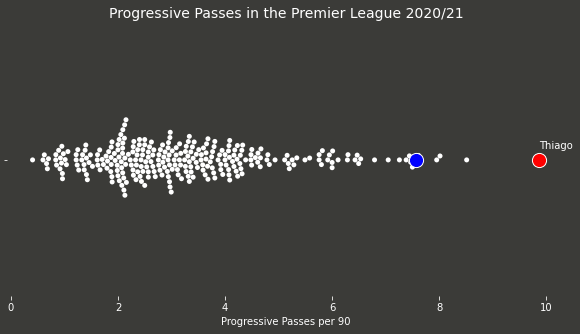

In [85]:
fig, ax = plt.subplots(figsize=(10,5))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','bottom','left','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

sns.swarmplot(x='per90',data=df,color='white',zorder=1)

#plot thiago
plt.scatter(x=9.87,y=0,c='red',edgecolor='white',s=200,zorder=2)
plt.text(s='Thiago',x=9.87,y=-.04,c=text_color)

#plot de bruyne
plt.scatter(x=7.564,y=0,c='blue',edgecolor='white',s=200,zorder=2)

plt.title('Progressive Passes in the Premier League 2020/21',c=text_color,fontsize=14)

plt.xlabel('Progressive Passes per 90',c=text_color)



#plt.savefig('swarm.png',dpi=500,bbox_inches = 'tight',facecolor=background)

In [184]:
#import our next dataframe
df2 = pd.read_csv('beeswarm2.csv')

In [185]:
df2.head(10)

,Player,Nation,Pos,Squad,90s,Cmp,Att,Cmp%,TotDist,PrgDist,Ast,xA,A-xA,KP,1/3,PPA,CrsPA,Prog
0,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,11.7,573,705,81.3,9485,4365,1,0.8,0.2,11,43,21,4,76
1,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,10.6,138,201,68.7,1925,327,1,0.9,0.1,8,12,2,0,11
2,Che Adams\Che-Adams,eng ENG,FW,Southampton,19.0,288,413,69.7,4739,1079,4,4.3,-0.3,22,20,12,0,38
3,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,18.0,779,905,86.1,18458,6406,0,0.1,-0.1,3,39,2,0,36
4,Adrián\Adrian,es ESP,GK,Liverpool,2.0,43,62,69.4,1147,723,0,0.0,0.0,0,0,0,0,0
5,Sergio Agüero\Sergio-Aguero,ar ARG,FW,Manchester City,1.6,33,42,78.6,386,58,0,0.6,-0.6,3,2,1,0,1
6,Ola Aina\Ola-Aina,ng NGA,DF,Fulham,17.7,782,1013,77.2,15293,6132,0,0.3,-0.3,8,66,11,6,69
7,Rayan Aït Nouri\Rayan-Ait-Nouri,fr FRA,DF,Wolves,7.7,299,357,83.8,4712,1364,1,0.7,0.3,6,13,6,3,18
8,Semi Ajayi\Semi-Ajayi,ng NGA,DF,West Brom,22.0,553,763,72.5,12087,5164,0,0.1,-0.1,2,50,3,0,46
9,Nathan Aké\Nathan-Ake,nl NED,DF,Manchester City,5.2,429,461,93.1,7845,2158,0,0.0,0.0,1,36,0,0,23


In [186]:
#do some data preprocessing and cleaning

#split the player names
df2['Player'] = df2['Player'].str.split('\\',expand=True)[0]

df2 = df2[df2['Pos'] != 'GK']

df2 = df2[df2['90s'] > 6.5].reset_index()

In [187]:
#make the per 90 stats
#metrics = ['Prog90','1/390','xA90','Cmp%','KP90','PPA90']
df2['Prog'] = df2['Prog'] / df2['90s']
df2['1/3'] = df2['1/3'] / df2['90s']
df2['xA'] = df2['xA'] / df2['90s']
df2['KP'] = df2['KP'] / df2['90s']
df2['PPA'] = df2['PPA'] / df2['90s']

In [188]:
print(df2.head())

df2.Player.unique()

   index               Player   Nation Pos           Squad   90s  Cmp   Att  \
0      0  Patrick van Aanholt   nl NED  DF  Crystal Palace  11.7  573   705   
1      1        Tammy Abraham  eng ENG  FW         Chelsea  10.6  138   201   
2      2            Che Adams  eng ENG  FW     Southampton  19.0  288   413   
3      3     Tosin Adarabioyo  eng ENG  DF          Fulham  18.0  779   905   
4      6             Ola Aina   ng NGA  DF          Fulham  17.7  782  1013   

   Cmp%  TotDist  PrgDist  Ast        xA  A-xA        KP       1/3       PPA  \
0  81.3     9485     4365    1  0.068376   0.2  0.940171  3.675214  1.794872   
1  68.7     1925      327    1  0.084906   0.1  0.754717  1.132075  0.188679   
2  69.7     4739     1079    4  0.226316  -0.3  1.157895  1.052632  0.631579   
3  86.1    18458     6406    0  0.005556  -0.1  0.166667  2.166667  0.111111   
4  77.2    15293     6132    0  0.016949  -0.3  0.451977  3.728814  0.621469   

   CrsPA      Prog  
0      4  6.495726  
1 

array(['Patrick van Aanholt', 'Tammy Abraham', 'Che Adams',
       'Tosin Adarabioyo', 'Ola Aina', 'Rayan Aït Nouri', 'Semi Ajayi',
       'Marc Albrighton', 'Thiago Alcántara', 'Toby Alderweireld',
       'Trent Alexander-Arnold', 'Ezgjan Alioski', 'Allan',
       'Miguel Almirón', 'Steven Alzate', 'Ethan Ampadu',
       'Joachim Andersen', 'Michail Antonio', 'Stuart Armstrong',
       'Pierre-Emerick Aubameyang', 'Serge Aurier', 'Jordan Ayew',
       'Luke Ayling', 'César Azpilicueta', 'Fabián Balbuena',
       'George Baldock', 'Patrick Bamford', 'Ross Barkley',
       'Ashley Barnes', 'Harvey Barnes', 'Kyle Bartley', 'Chris Basham',
       'Michy Batshuayi', 'Jan Bednarek', 'Héctor Bellerín',
       'Saïd Benrahma', 'Christian Benteke', 'Jóhann Berg Guðmundsson',
       'Sander Berge', 'Steven Bergwijn', 'Ryan Bertrand',
       'Yves Bissouma', 'Jayden Bogle', 'Willy Boly', 'Jarrod Bowen',
       'Robbie Brady', 'Rhian Brewster', 'Josh Brownhill', 'Oliver Burke',
       'Dan Burn',

In [189]:
#create a list of 6 metrics to compare
metrics = ['Prog','1/3','xA','Cmp%','KP','PPA']

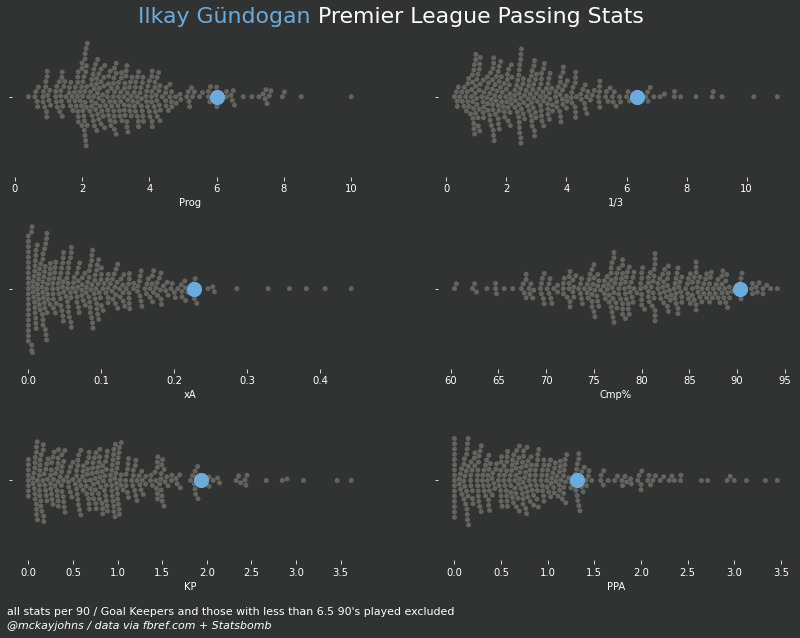

In [232]:
fig,axes = plt.subplots(3,2,figsize=(14,10))
fig.set_facecolor(background)
ax.patch.set_facecolor(background)

#set up our base layer
mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color

#create a list of comparisons
counter=0
counter2=0
met_counter = 0

for i,ax in zip(df2['Player'],axes.flatten()):
    ax.set_facecolor(background)
    ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
    
    spines = ['top','bottom','left','right']
    for x in spines:
        if x in spines:
            ax.spines[x].set_visible(False)
            
    sns.swarmplot(x=metrics[met_counter],data=df2,ax=axes[counter,counter2],zorder=1,color='#64645e')
    ax.set_xlabel(f'{metrics[met_counter]}',c='white')
    
    for x in range(len(df2['Player'])):
        #if df2['Player'][x] == 'Thiago Alcántara':
            #ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='red',zorder=2)
        if df2['Player'][x] == 'İlkay Gündoğan':
            ax.scatter(x=df2[metrics[met_counter]][x],y=0,s=200,c='#6CABDD',zorder=2)
                        
    met_counter+=1
    if counter2 == 0:
        counter2 = 1
        continue
    if counter2 == 1:
        counter2 = 0
        counter+=1
        

        
s='<Ilkay Gündogan> Premier League Passing Stats'
highlight_text.fig_text(s=s,
                x=.25, y=.88,
                #highlight_weights = ['bold'],
                fontsize=22,
                fontfamily = 'Andale Mono',
                color = text_color,
                highlight_colors = ['#6CABDD'],
                va='center'
               )

fig.text(.12,.05,"all stats per 90 / Goal Keepers and those with less than 6.5 90's played excluded",fontsize=11, fontfamily='Andale Mono',color=text_color)
fig.text(.12,.03,"@mckayjohns / data via fbref.com + Statsbomb", fontstyle='italic',fontsize=11, fontfamily='Andale Mono',color=text_color)

plt.savefig('test.png',dpi=500,bbox_inches = 'tight',facecolor=background)